# Naive_Bayes learning and Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("adult.csv")
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32560, 15)

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [8]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [9]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [10]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [11]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace('?', np.NaN, inplace=True)

In [12]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)

In [13]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace('?', np.NaN, inplace=True)

In [14]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [15]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [16]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [23]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [31]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [34]:
#Since naive bayes takes all in float values and all we need to encode it
import category_encoders as ce

In [35]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [36]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
12467,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15282,54,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24869,35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18822,33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26403,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,43,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,21,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
22278,40,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8950,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16505,21,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19140,59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21297,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7694,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10410,67,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#we can see that the number of columns has increased after encoding
#now to scale all the one level we need to do feature scaling

In [39]:
cols = X_train.columns

In [40]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [41]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [42]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [43]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.85,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#now let us train the model

In [45]:
model=GaussianNB()

In [46]:
model.fit(X_train, Y_train)

GaussianNB()

In [47]:
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)

In [48]:
Y_train_pred

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score

In [53]:
confusion_matrix(Y_train, Y_train_pred)

array([[15790,  3972],
       [ 1191,  5095]], dtype=int64)

In [55]:
confusion_matrix(Y_test, Y_test_pred)

array([[3971,  986],
       [ 290, 1265]], dtype=int64)

In [56]:
accuracy_score(Y_test, Y_test_pred)

0.8040540540540541

In [59]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 0.8018
Test set score: 0.8041


In [60]:
#so by seeing not so much difference in both of scores we can say no under or overfitting

In [63]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4957
        >50K       0.56      0.81      0.66      1555

    accuracy                           0.80      6512
   macro avg       0.75      0.81      0.76      6512
weighted avg       0.84      0.80      0.81      6512



In [64]:
Y_test.value_counts()

 <=50K    4957
 >50K     1555
Name: income, dtype: int64

In [65]:
# check null accuracy score

null_accuracy = (4957/(4957+1555))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7612


In [66]:
#so our model is good

In [68]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3971  986]
 [ 290 1265]]

True Positives(TP) =  3971

True Negatives(TN) =  1265

False Positives(FP) =  986

False Negatives(FN) =  290


<Axes: >

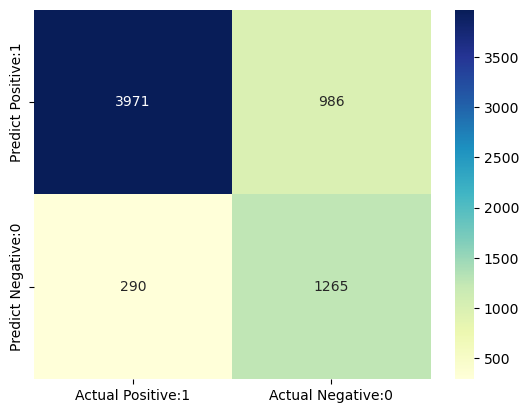

In [69]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [71]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8041


In [72]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1959


In [73]:
#we cant ask the user for input and do prediction like in others directly ig(see to it)
#ig take input from user and for that also encode and scale and then just try

In [74]:
#so steps

#1.obtain dataset and understand
#2.prepare data-see to that all category and numerical has null or categorical ka strings and all handle,handle missing values
#handle of numerical also 
#3.split to train and test
#4.again in train and test also see once to conifrm and handle if missing values and all
#5.since categorical do encoding and scaling so that all are in one scale
#6.Model train and get both test and train prediction
#7.see the both ka confusing matrix,classification report,accuracy and scores and understan



#learn

#different naive bayes model are there that for what which one learn

In [75]:
# Take user input for column names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'
]

# Create an empty dictionary to store user input data
data = {}

# Get user input for each column
for col in columns:
    user_input = input(f"Enter values for '{col}': ")
    # Split the user input by comma if it contains multiple values
    data[col] = user_input.split(',')

# Create DataFrame using the collected data
df1 = pd.DataFrame(data)

# Display the DataFrame
print(df1)

Enter values for 'age': 38
Enter values for 'workclass': Private
Enter values for 'fnlwgt': 215646
Enter values for 'education': HS-grad
Enter values for 'education_num': 9
Enter values for 'marital_status': Divorced	Handlers-cleaners	Not-in-family
Enter values for 'occupation': Handlers-cleaners
Enter values for 'relationship': Not-in-family
Enter values for 'race': White
Enter values for 'sex': Male
Enter values for 'capital_gain': 0
Enter values for 'capital_loss': 0
Enter values for 'hours_per_week': 40
Enter values for 'native_country': United States
  age workclass  fnlwgt education education_num  \
0  38   Private  215646   HS-grad             9   

                               marital_status         occupation  \
0  Divorced\tHandlers-cleaners\tNot-in-family  Handlers-cleaners   

    relationship   race   sex capital_gain capital_loss hours_per_week  \
0  Not-in-family  White  Male            0            0             40   

  native_country  
0  United States  


In [76]:
df1 = encoder.fit_transform(df1)

In [77]:
df1

,age,workclass_1,fnlwgt,education_1,education_num,marital_status_1,occupation_1,relationship_1,race_1,sex_1,capital_gain,capital_loss,hours_per_week,native_country_1
0,38,1,215646,1,9,1,1,1,1,1,0,0,40,1


In [78]:
df1 = scaler.fit_transform(df1)

In [79]:
df1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
model.predict(df1)

In [81]:
#so we cant do like this as our prediction features is different so that is the problem so look of it